# Problem Statement

* About Dataset: The purpose of this dataset is to help us understand customer behavior and purchasing data in a supermarket mall through membership cards. The data includes basic information about customers such as their ID, age, gender, annual income, and spending score. Spending score is a parameter assigned to customers based on their purchasing behavior. The goal of this dataset is to use unsupervised ML techniques to segment the customers into groups and identify the target customers who are likely to converge. By understanding the customers better, the mall can plan their marketing strategy accordingly and increase their revenue. This dataset is designed for learning purposes and serves as an excellent example of how to use unsupervised machine learning algorithms in practice.
* Problem Statement and Objective The mall wants to understand the customer segments to better target marketing efforts and improve sales. The objective of this project is to identify distinct customer segments and provide recommendations to the marketing team to develop targeted marketing strategies.

# Assignment:

### Part1: Modeling, Hyperparameter Tuning & Evaluation
- Modeling for customer segmentation (use pycaret to experiment with multiple algorithms )
- Select one of the best performing algorithms based on clustering model evaluation metrics. (Good to plot the datapoints in 3d and evaluate as well.
- Improve the performance of the shortlisted model
- Compare the evaluation metrics for the optimal combination of parameters.

### Part2: Model Explanation & Understanding
- Do the prediction on the training dataset for assigning clusters/labels to each row.
- Approach1 (Manual Analysis): Do the cluster/segment analysis
    - See the average mean of feature values for different clusters
    - Analyze it and try to give them the meaningful name (rather than cluster_0, cluster_1, we want to assign them a meaningful self explanatory name)
        - For example:
            - if Mean Age is 25, and Mean Income is 57k in cluster 1 , then the name can be "Young Moderate Income"
            - if Mean Age is 27 and Mean Income is 25k in cluster 2, then the name can be "Young Low Income"
- Approach2 (Using classification algorithm for model explaination): Train a classification model using the labelled data, that means you have to use the cluster labels as your Target variable now.
    - Once the classification model is trained, do the Global & Local explaination using SHAP & LIME libraries.
    - Put your observation for this
    - Think in terms of if the clustering labels are meaningful or not.
- Compare your understanding and observations from both the approaches and see if they are inline.
    - Goal here is to re-validate the model and establish a trust.

- Finalize model: Train the selected algorithm over the entire dataset (TRAIN + TEST) using the optimal hyperparameter values.
- Export the model file in the pickle format and save it in a "./model" directory. (use proper naming and version)

NOTE: Dataset is small and simple, Focus should be on trying out different techniques and get your hands dirty.

# Write-up
* Explain in detail your observations, outcomes and why you have taken a certain approach over the other. Keep the code modular and efficient.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(14,6)})


In [2]:
df = pd.read_csv("mall_customers.csv")

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

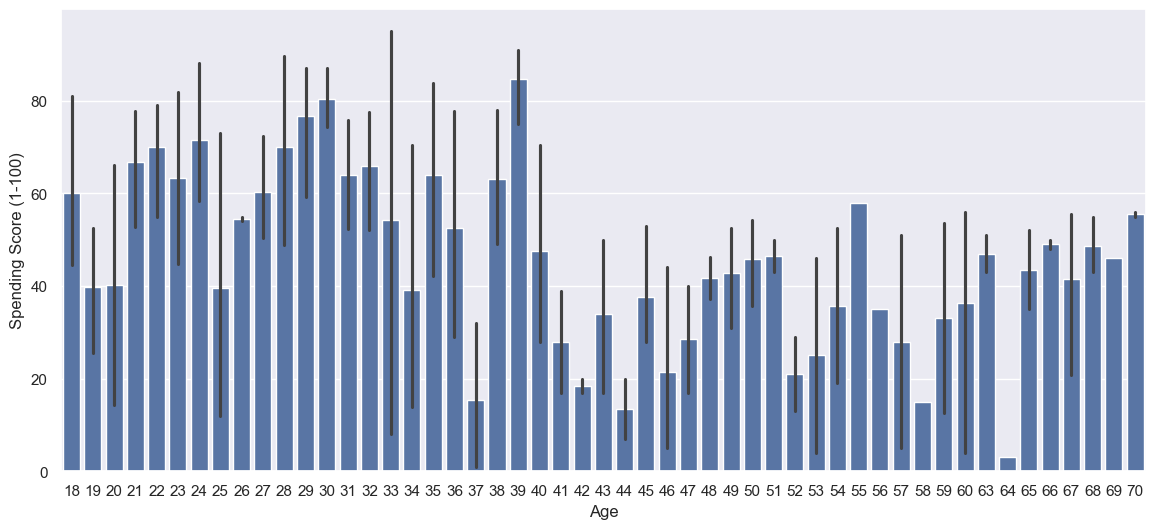

In [9]:
sns.barplot(data=df, x=df['Age'], y = df['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

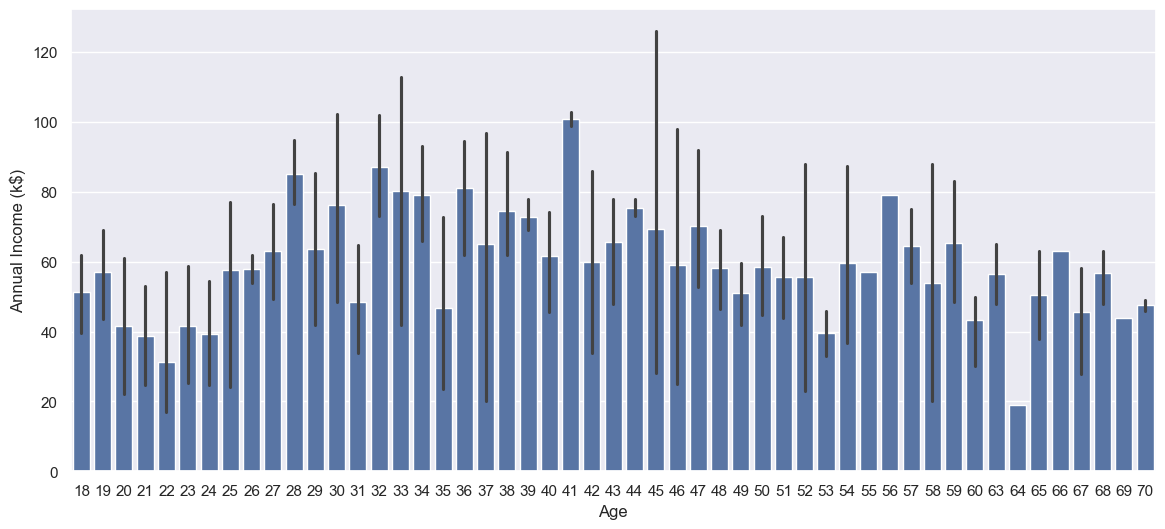

In [10]:
sns.barplot(data=df, x = df['Age'], y=df['Annual Income (k$)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

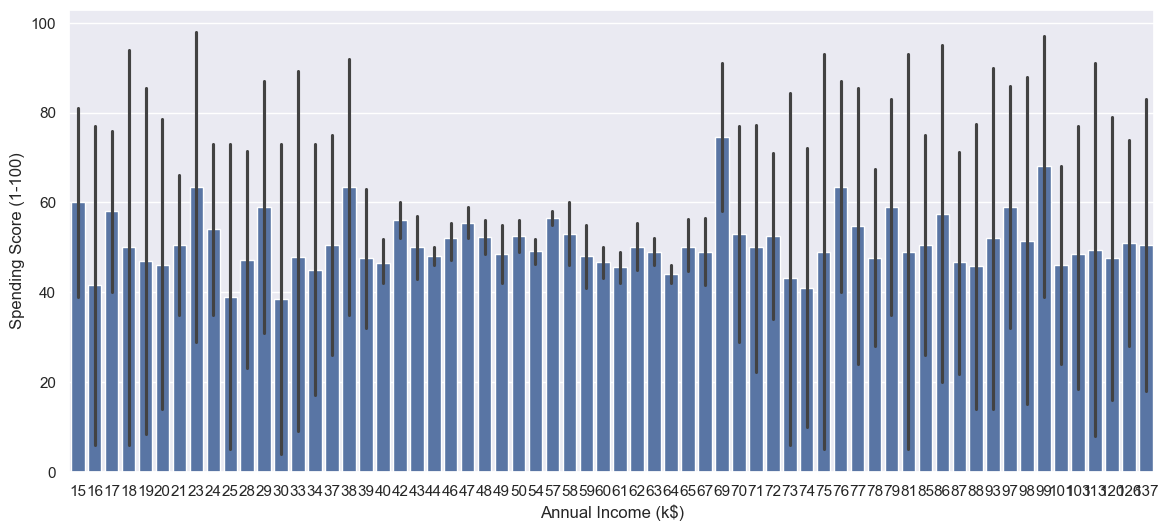

In [11]:
sns.barplot(data=df, x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'])

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

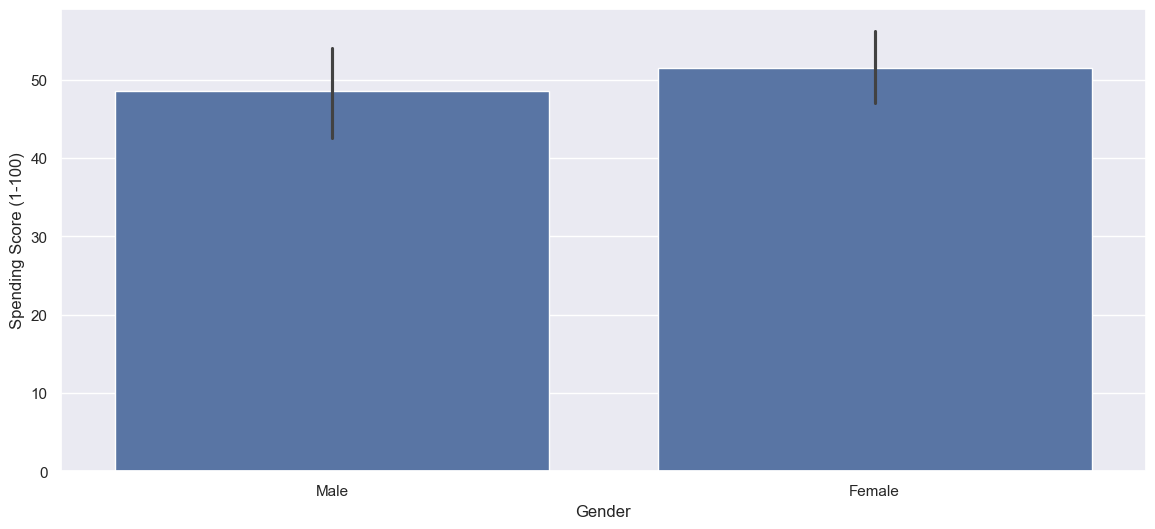

In [12]:
sns.barplot(data=df, x = df['Gender'], y= df['Spending Score (1-100)'])

#### Above we can see almost the same spending score , so the spending score is not gender bias

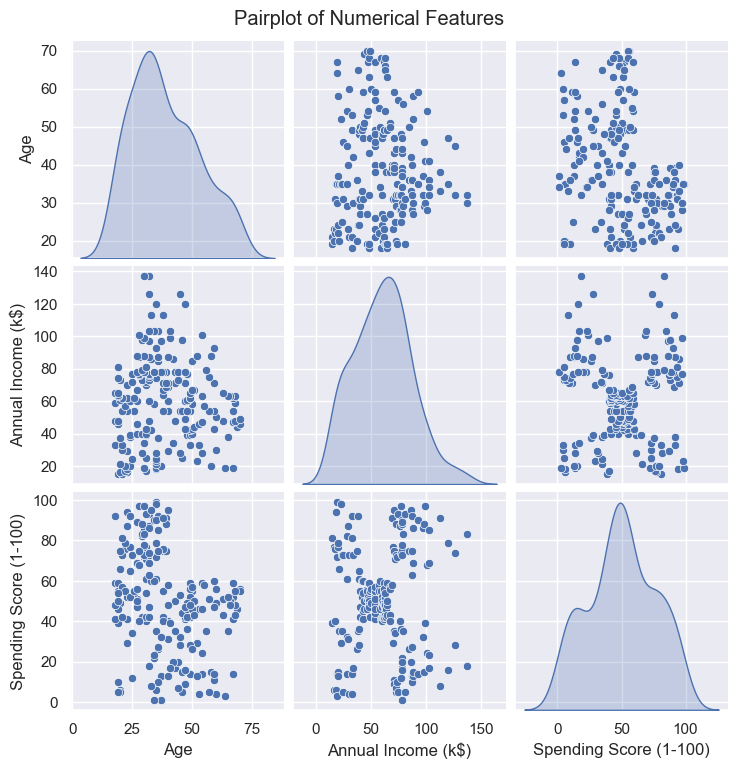

In [13]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

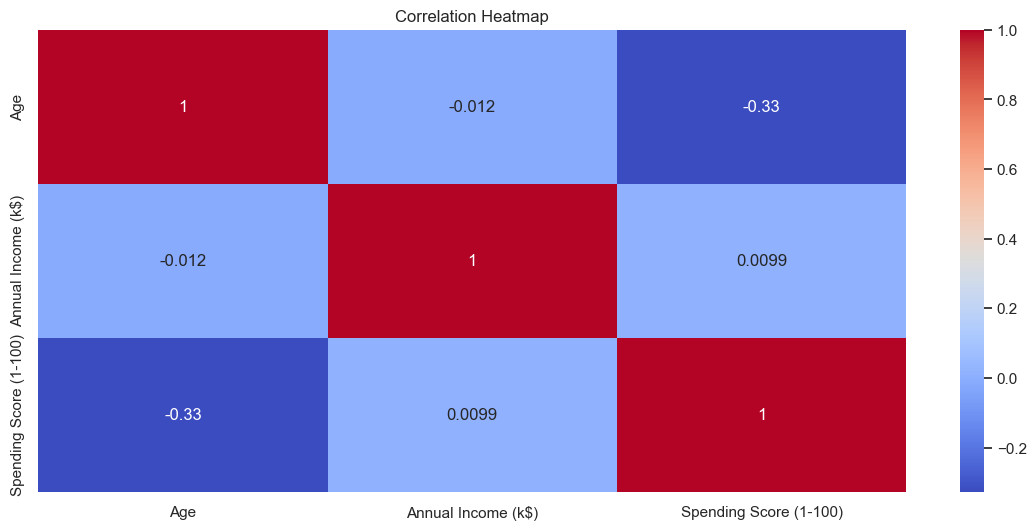

In [14]:
corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

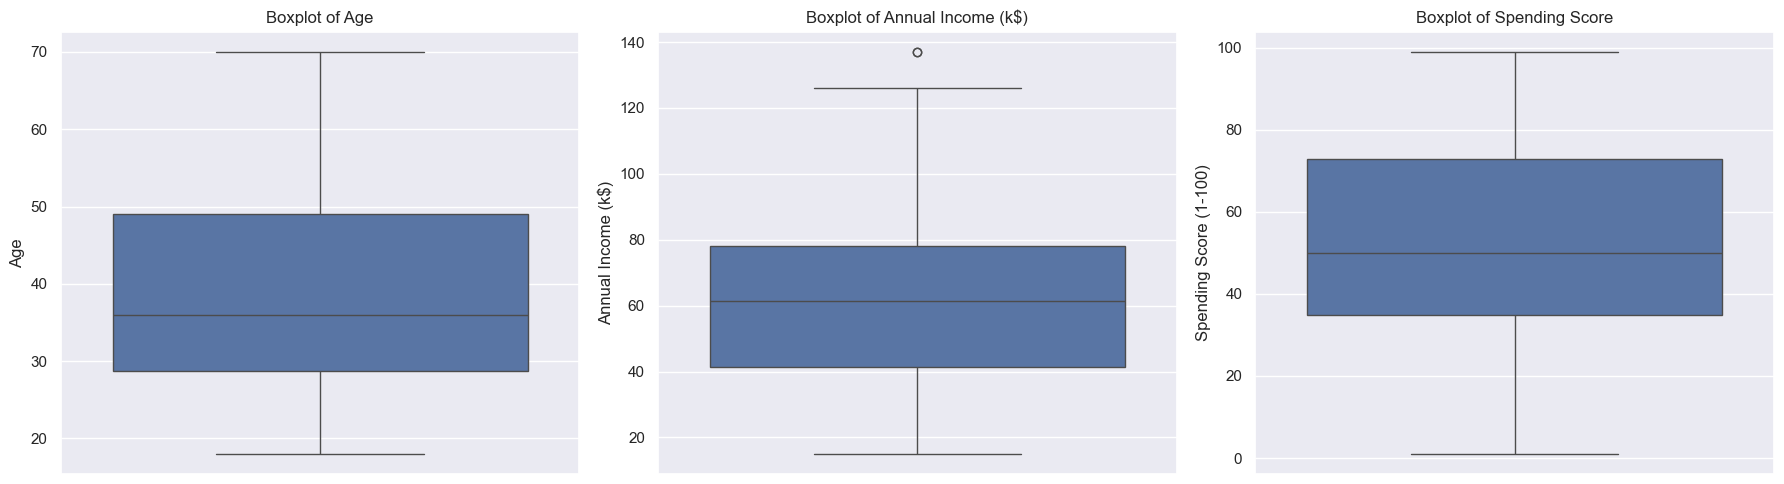

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df['Age'], ax=axes[0])
axes[0].set_title('Boxplot of Age')
sns.boxplot(y=df['Annual Income (k$)'], ax=axes[1])
axes[1].set_title('Boxplot of Annual Income (k$)')
sns.boxplot(y=df['Spending Score (1-100)'], ax=axes[2])
axes[2].set_title('Boxplot of Spending Score')
plt.tight_layout()
plt.show()

## Feature Engineering

In [16]:
df["Gender_Encoded"] = df["Gender"].map({"Male": 0, "Female":1})
df[["Gender","Gender_Encoded"]]

,Gender,Gender_Encoded
0,Male,0
1,Male,0
2,Female,1
3,Female,1
4,Female,1
...,...,...
195,Female,1
196,Female,1
197,Male,0
198,Male,0


In [17]:
# data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
# data_unseen = df.drop(data.index).reset_index(drop=True)

# print('Data for Modeling: ' + str(data.shape))
# print('Unseen Data For Predictions: ' + str(data_unseen.shape))

### CLUSTERING

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [19]:
from pycaret.clustering import *
s = setup(df, normalize=True, ignore_features=["CustomerID","Gender"], session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 6)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,2
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


In [20]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


#### Utility fucntion to train and evaluate all the available alogrithms

In [21]:
from pycaret.clustering import *
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_all_models(df, num_clusters=5, plot=True):
    # Initialize PyCaret setup
    setup(
        df,
        normalize=True,
        ignore_features=["CustomerID","Gender"],
        session_id=123,
        experiment_name='Mall_Clustering'
    )
    
    results = []

    for model_name in models().index:
        try:
            # Create model
            if model_name in ["kmeans", "hclust", "ap", "kmodes"]:
                model = create_model(model_name, num_clusters=num_clusters)
            else:
                model = create_model(model_name)
            
            # Assign clusters
            clustered_df = assign_model(model)
            
            # Get preprocessed features used by PyCaret
            X_transformed = get_config('X')
            labels = clustered_df['Cluster']
            
            # Calculate clustering metrics manually
            if len(set(labels)) > 1:
                silhouette = silhouette_score(X_transformed, labels)
                ch_score = calinski_harabasz_score(X_transformed, labels)
                db_score = davies_bouldin_score(X_transformed, labels)
            else:
                silhouette, ch_score, db_score = -1, -1, -1
            
            print(f"\nEvaluating {model_name.upper()}: "
                  f"Silhouette={silhouette:.4f}, "
                  f"Calinski-Harabasz={ch_score:.4f}, "
                  f"Davies-Bouldin={db_score:.4f}")
            
            results.append((model_name, silhouette, ch_score, db_score, None))
            
            # Optional plotting
            if plot:
                plots_to_try = ['elbow', 'cluster', 'tsne', 'silhouette', 'distribution', 'distance']
                for p in plots_to_try:
                    if model_name != 'kmeans' and p == 'elbow':
                        continue  # elbow only for KMeans
                    try:
                        plot_model(model, plot=p)
                    except:
                        print(f"{model_name.upper()} plot '{p}' not available")
                        
        except Exception as e:
            print(f"Exception occurred for {model_name}: {e}")
            results.append((model_name, None, None, None, str(e)))
    
    return pd.DataFrame(
        results,
        columns=["Model", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin", "Error"]
    ).sort_values(by="Silhouette", ascending=False, na_position='last')


,Description,Value
0,Session id,123
1,Original data shape,"(200, 6)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,2
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3166,70.9984,1.1414,0,0,0



Evaluating KMEANS: Silhouette=0.0394, Calinski-Harabasz=41.0508, Davies-Bouldin=9.5541


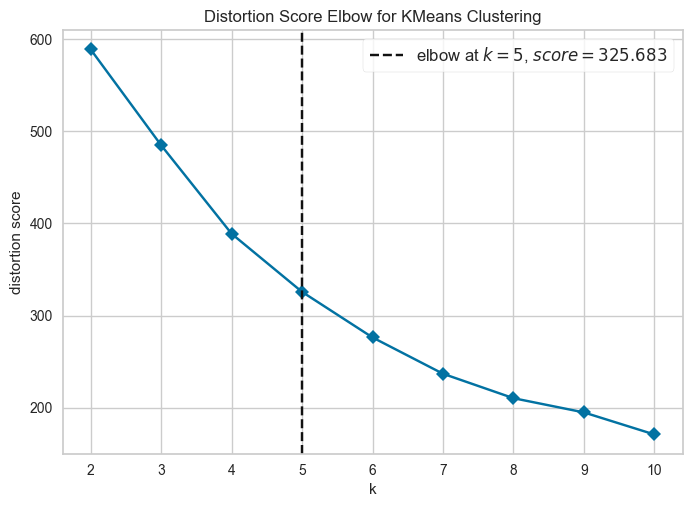

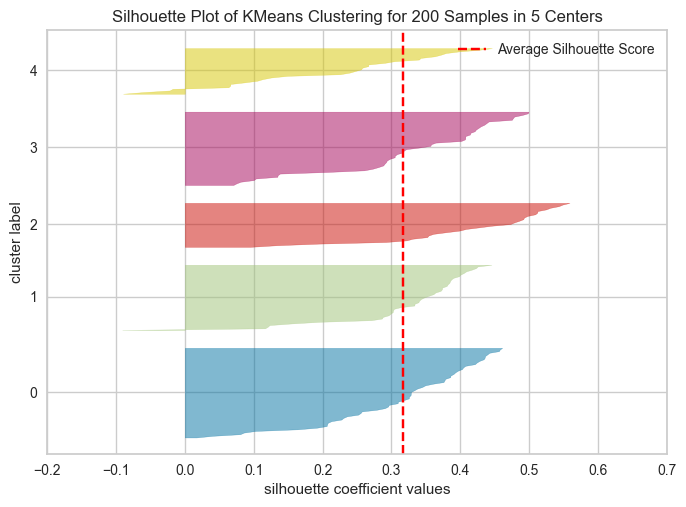

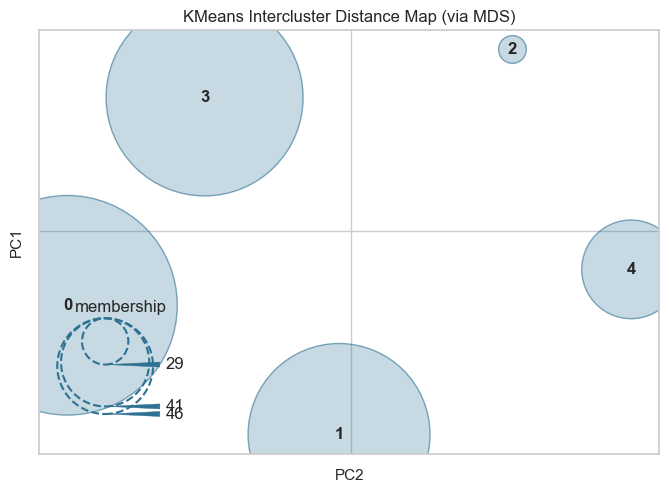

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4036,91.1201,0.8553,0,0,0



Evaluating AP: Silhouette=0.0016, Calinski-Harabasz=67.7020, Davies-Bouldin=3.3111


AP plot 'silhouette' not available


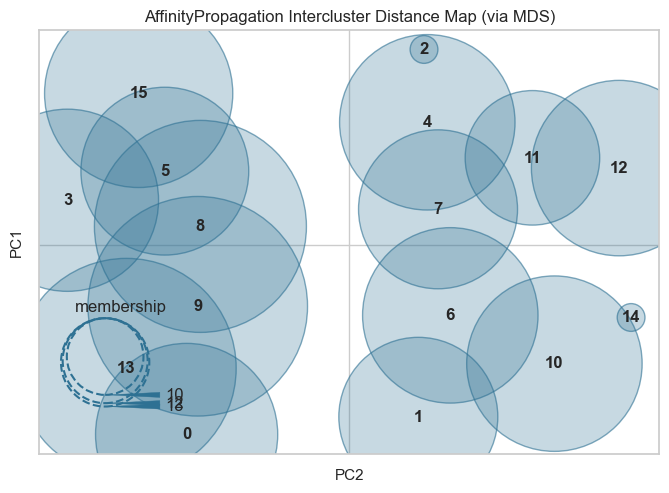

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0



Evaluating MEANSHIFT: Silhouette=-1.0000, Calinski-Harabasz=-1.0000, Davies-Bouldin=-1.0000


MEANSHIFT plot 'silhouette' not available


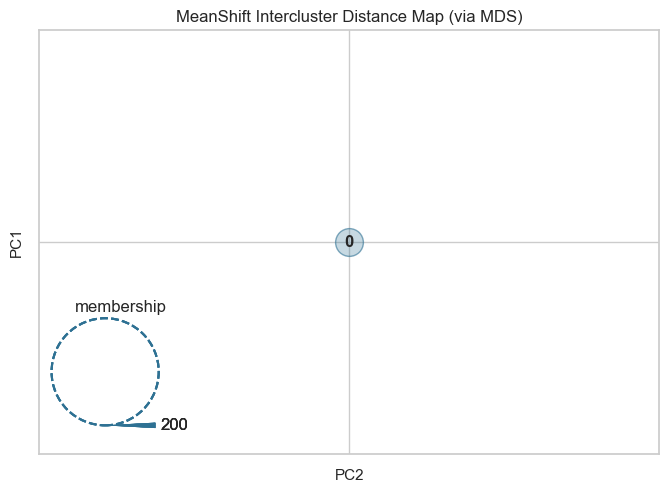

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2710,55.0838,1.1092,0,0,0



Evaluating SC: Silhouette=-0.0266, Calinski-Harabasz=22.4062, Davies-Bouldin=2.2885


SC plot 'silhouette' not available


SC plot 'distance' not available


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2870,64.4687,1.2198,0,0,0



Evaluating HCLUST: Silhouette=0.2555, Calinski-Harabasz=87.3231, Davies-Bouldin=2.5028


HCLUST plot 'silhouette' not available


HCLUST plot 'distance' not available


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0120,12.0994,1.3894,0,0,0



Evaluating DBSCAN: Silhouette=-0.1863, Calinski-Harabasz=8.3926, Davies-Bouldin=2.5446


DBSCAN plot 'silhouette' not available


DBSCAN plot 'distance' not available


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0355,12.2760,1.4398,0,0,0



Evaluating OPTICS: Silhouette=-0.2806, Calinski-Harabasz=12.5093, Davies-Bouldin=3.6168


OPTICS plot 'silhouette' not available


OPTICS plot 'distance' not available


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2626,59.8642,1.2881,0,0,0



Evaluating BIRCH: Silhouette=0.1885, Calinski-Harabasz=58.0044, Davies-Bouldin=3.0220


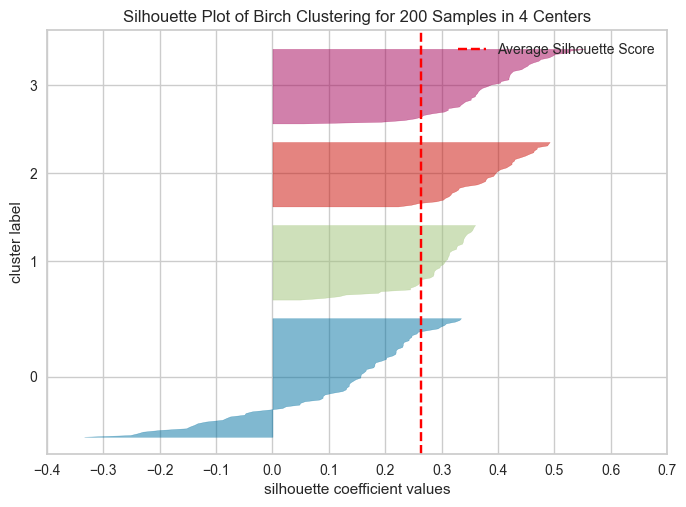

BIRCH plot 'distance' not available


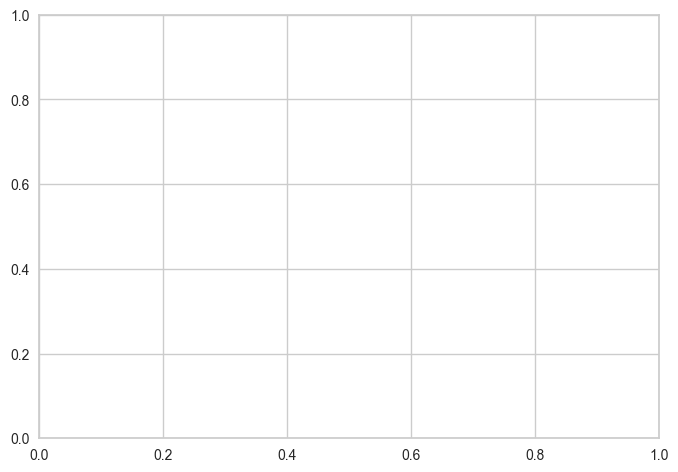

In [22]:
results = evaluate_all_models(df,num_clusters=5)

In [23]:
results

,Model,Silhouette,Calinski-Harabasz,Davies-Bouldin,Error
4,hclust,0.255526,87.323144,2.502761,None
7,birch,0.188516,58.004356,3.021967,None
0,kmeans,0.039350,41.050811,9.554080,None
1,ap,0.001611,67.701978,3.311104,None
3,sc,-0.026613,22.406156,2.288520,None
5,dbscan,-0.186261,8.392630,2.544577,None
6,optics,-0.280587,12.509269,3.616812,None
2,meanshift,-1.000000,-1.000000,-1.000000,None


#### Picking top 3 models

In [24]:
hclust_mode = create_model('hclust', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2870,64.4687,1.2198,0,0,0


In [25]:
sc_model = create_model('birch', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2913,63.4079,1.1936,0,0,0


In [26]:
kmeans_model = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3166,70.9984,1.1414,0,0,0


#### Chosing Kmeans as best model

In [27]:
clustered_df = assign_model(kmeans_model)
clustered_df["Cluster"].value_counts()

Cluster
Cluster 0    56
Cluster 3    46
Cluster 1    41
Cluster 4    29
Cluster 2    28
Name: count, dtype: int64

In [28]:
clustered_df.to_csv('clustered_customers.csv', index=False)

### PART-2

#### Manual Approach

In [29]:
cluster_summary = clustered_df.groupby('Cluster').mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded
Cluster,,,,
Cluster 0,28.392857,60.428571,68.178571,1.000000
Cluster 1,28.536585,61.804878,71.097561,0.000000
Cluster 2,57.214286,46.785714,38.714286,0.000000
Cluster 3,49.043478,48.913043,37.217391,1.000000
Cluster 4,39.724138,90.827586,17.620690,0.344828


#### Explanation for Cluster Names

1. **Cluster 0 – Young High Income, High Spenders (Female)**  
   - Age ~28, moderate-high income (~60k$), high spending score (~68).  
   - All female; young women who spend actively.  

2. **Cluster 1 – Young High Income, High Spenders (Male)**  
   - Age ~28, moderate-high income (~62k$), high spending (~71).  
   - All male; young men who are active shoppers.  

3. **Cluster 2 – Older Moderate Income, Moderate Spenders (Male)**  
   - Age ~57, lower-moderate income (~47k$), moderate spending (~39).  
   - All male; older men with conservative spending behavior.  

4. **Cluster 3 – Older Moderate Income, Moderate Spenders (Female)**  
   - Age ~49, lower-moderate income (~49k$), moderate spending (~37).  
   - All female; older women with conservative spending behavior.  

5. **Cluster 4 – Middle-Age High Income, Low Spenders (Mixed)**  
   - Age ~40, very high income (~91k$), very low spending (~18).  
   - Mixed gender; affluent adults who are currently low spenders.

---

#### Observations

* **Clusters 0 & 1** are young, high-income, high spenders but **gender-separated**.  
* **Clusters 2 & 3** are older, moderate-income, moderate spenders, also **gender-separated**.  
* **Cluster 4** is mixed-gender, high income but low spending → ideal for **premium offers or loyalty programs**.  
* Some clusters are fully male or fully female, which can guide **demographic-specific marketing campaigns**.  
* Cluster naming reflects **age, income, spending behavior, and gender**, making it actionable for **marketing strategy** and targeting.

##### Assgning cluster names to turn into supervised learning

In [75]:
cluster_names = {
    "Cluster 0": "Young High Income, High Spenders (Female)",
    "Cluster 1": "Young High Income, High Spenders (Male)",
    "Cluster 2": "Older Moderate Income, Moderate Spenders (Male)",
    "Cluster 3": "Older Moderate Income, Moderate Spenders (Female)",
    "Cluster 4": "Middle-Age High Income, Low Spenders (Mixed)"
}



In [76]:
clustered_df['Cluster_Name'] = clustered_df['Cluster'].map(cluster_names)

In [77]:
clustered_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded,Cluster,Cluster_Name
0,19,15,39,0,Cluster 1,"Young High Income, High Spenders (Male)"
1,21,15,81,0,Cluster 1,"Young High Income, High Spenders (Male)"
2,20,16,6,1,Cluster 3,"Older Moderate Income, Moderate Spenders (Female)"
3,23,16,77,1,Cluster 0,"Young High Income, High Spenders (Female)"
4,31,17,40,1,Cluster 3,"Older Moderate Income, Moderate Spenders (Female)"


In [78]:
clustered_df.shape

(200, 6)

In [79]:
clustered_df.to_csv('clustered_customers_named.csv', index=False)

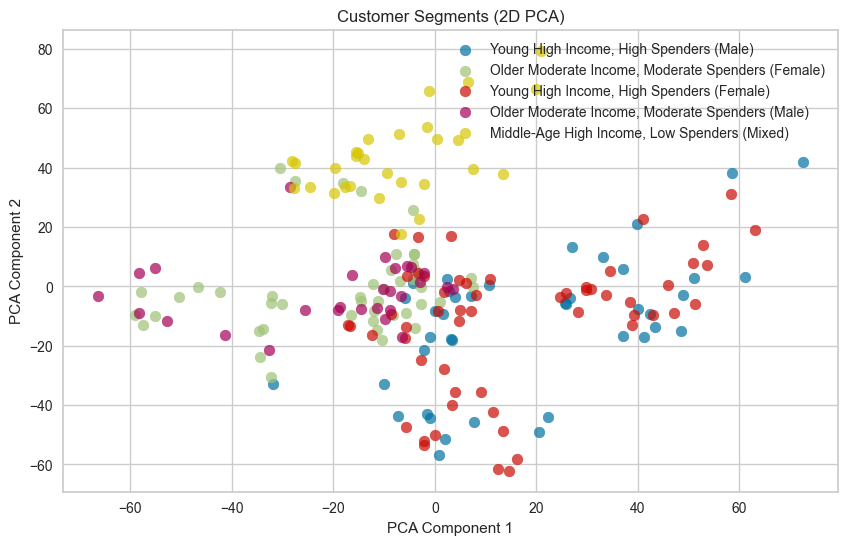

In [80]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = clustered_df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Encoded']]
y = clustered_df['Cluster_Name']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))

for cluster_name in y.unique():
    mask = y == cluster_name
    plt.scatter(X_pca[mask,0],X_pca[mask,1],label=cluster_name, s=60, alpha=0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments (2D PCA)')
plt.legend()
plt.grid(True)
plt.show()

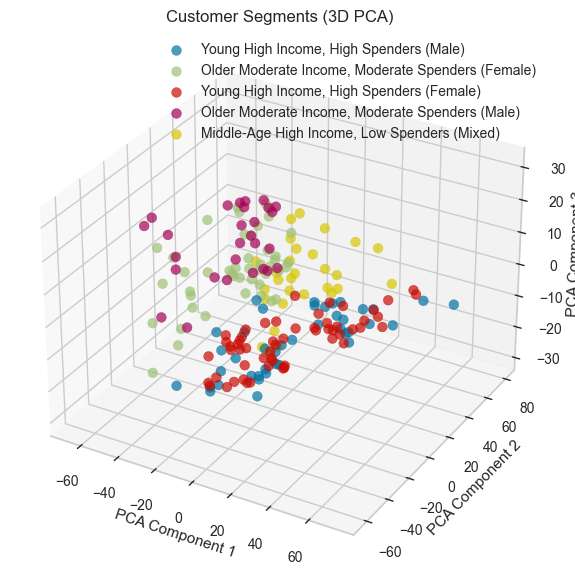

In [81]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for cluster_name in y.unique():
    mask = y == cluster_name
    ax.scatter(X_pca3[mask,0], X_pca3[mask,1], X_pca3[mask,2], label=cluster_name, s=50, alpha=0.7)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Customer Segments (3D PCA)')
ax.legend()
plt.show()


### Approach 2

In [82]:
X = clustered_df.drop(columns=["Cluster",'Cluster_Name'])
y = clustered_df['Cluster_Name']

**Train a classification model**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

X_train,X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)


In [84]:
RFClf = RandomForestClassifier(n_estimators=200, random_state=123)
RFClf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=123)

In [85]:
y_pred = RFClf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                                                    precision    recall  f1-score   support

     Middle-Age High Income, Low Spenders (Mixed)       1.00      0.67      0.80         6
Older Moderate Income, Moderate Spenders (Female)       0.82      1.00      0.90         9
  Older Moderate Income, Moderate Spenders (Male)       1.00      1.00      1.00         6
        Young High Income, High Spenders (Female)       1.00      1.00      1.00        11
          Young High Income, High Spenders (Male)       1.00      1.00      1.00         8

                                         accuracy                           0.95        40
                                        macro avg       0.96      0.93      0.94        40
                                     weighted avg       0.96      0.95      0.95        40

Confusion Matrix:
 [[ 4  2  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0  8]]


### Observations from Classification Model

#### Overall Performance
* The classifier achieved **95% accuracy**, indicating that the clusters are well-separated and meaningful.

#### Perfectly Predicted Clusters
* **Older Moderate Income, Moderate Spenders (Male)**
* **Young High Income, High Spenders (Female)**
* **Young High Income, High Spenders (Male)**  

*All these clusters have **F1-scores of 1.0**, showing clear feature separation.*

#### Clusters with Minor Misclassifications
* **Middle-Age High Income, Low Spenders (Mixed)** → 2 out of 6 samples misclassified (recall = 0.67)  
* **Older Moderate Income, Moderate Spenders (Female)** → all correctly classified, but slightly lower precision due to overlap with other clusters

#### Feature Insights
* **Age, Annual Income, Spending Score, and Gender** are key differentiators for predicting cluster membership.  
* Clusters that are **gender-segregated** (e.g., Older Moderate Income Male/Female, Young High Spenders Male/Female) are easier to classify.  
* Clusters with **overlapping feature ranges** (e.g., Middle-Age High Income with moderate spending) are slightly harder to classify.

#### Marketing Implications
* Well-defined clusters can guide **targeted campaigns**.  
* **Gender-specific or age-specific strategies** can be designed based on cluster characteristics.  
* High-income but low-spending clusters (e.g., Middle-Age High Income) are potential targets for **premium offers or loyalty programs**.

#### Validation
* The high accuracy and F1-scores confirm that the **unsupervised clustering effectively captured meaningful segments**, making it trustworthy for business decision-making.

#### Explainability

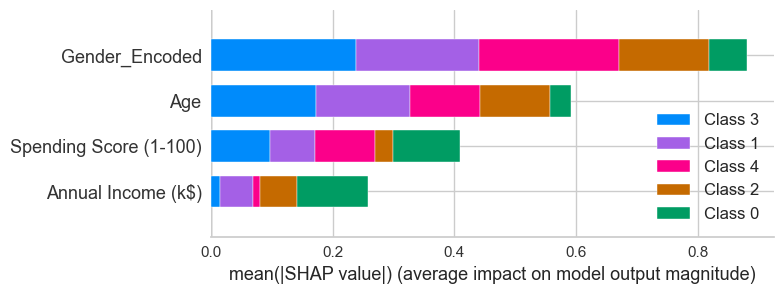

In [86]:
import shap
explainer = shap.TreeExplainer(RFClf)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values,X_train, plot_type = 'bar')

### Global SHAP Analysis

* The plot represents the **average impact of each feature** on the model's predictions across all clusters.
* **X-axis:** mean(|SHAP value|) → indicates the magnitude of influence on the model output.
* **Y-axis:** Features used in the model:
  - **Annual Income (k$)**
  - **Spending Score (1-100)**
  - **Age**
  - **Gender_Encoded**

#### Observations

* **Gender_Encoded** has the **highest average impact**, meaning gender is a strong predictor of cluster membership.
* **Age** and **Spending Score** also contribute significantly, indicating these features help differentiate clusters effectively.
* **Annual Income** has relatively lower but still noticeable influence, suggesting some clusters are income-driven.
* Color-coded bars represent each cluster’s contribution (Class 0 → Class 4):
  - Different clusters are influenced by features differently. For example:
    - Cluster 3 (blue) is heavily impacted by Gender and Age.
    - Cluster 4 (pink) is mostly affected by Spending Score.
* Overall, the model relies on **gender, age, and spending behavior** as the key differentiators between customer segments.

#### Local Annalysis

In [91]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

def explain_instance_lime(RFClf, X_train, X_test, y_test, instance_idx, num_features=10, save_html=False):

    instance = X_test.iloc[instance_idx].values
    
    actual_label = y_test.iloc[instance_idx]
    predicted_label = RFClf.predict([instance])[0]
    predicted_proba = RFClf.predict_proba([instance])[0]
    
    print(f"--- Local Explanation for Test Instance {instance_idx} ---")
    print(f"Feature values:\n{X_test.iloc[instance_idx]}\n")
    print(f"Actual label: {actual_label}")
    print(f"Predicted label: {predicted_label}")
    print(f"Prediction probabilities: {predicted_proba}\n")
    
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns,
        class_names=RFClf.classes_.astype(str),
        mode='classification'
    )
    
    # Explain instance (all labels)
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=RFClf.predict_proba,
        num_features=num_features
    )
    
    # Determine which label to plot
    predicted_label_idx = list(RFClf.classes_).index(predicted_label)
    if predicted_label_idx in exp.local_exp:
        label_to_plot = predicted_label_idx
    else:
        print(f"Predicted label '{predicted_label}' not in LIME explanation keys {list(exp.local_exp.keys())}")
        # fallback to first available explanation
        label_to_plot = list(exp.local_exp.keys())[0]
    
    # Visualize
    exp.as_pyplot_figure(label=label_to_plot)
    plt.show()
    
    # Optionally save HTML
    if save_html:
        exp.save_to_file(f"lime_local_explanation_instance_{instance_idx}.html")
        print(f"Interactive HTML saved: lime_local_explanation_instance_{instance_idx}.html")


In [106]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

def explain_instance_shap(RFClf, X_train, X_test, y_test, instance_idx, save_plot=False, plot_filename=None, top_n=10):
    """
    Explain a single instance prediction using SHAP for a RandomForestClassifier.

    Parameters:
    - RFClf: Trained RandomForestClassifier
    - X_train: Training features (DataFrame)
    - X_test: Test features (DataFrame)
    - y_test: Test labels (Series)
    - instance_idx: Index of the instance in X_test to explain
    - save_plot: Boolean, whether to save the plot
    - plot_filename: Optional filename for saving the plot
    - top_n: Number of top features to plot

    Returns:
    - shap_values_for_class: numpy array of SHAP values for predicted class
    - shap_series: pandas Series of SHAP values aligned with X_train.columns
    """
    
    # Select instance (2D DataFrame)
    instance = X_test.iloc[[instance_idx]]
    actual_label = y_test.iloc[instance_idx]
    
    # Predict label and probabilities
    predicted_label = RFClf.predict(instance)[0]
    predicted_proba = RFClf.predict_proba(instance)[0]
    
    print(f"--- SHAP Local Explanation for Test Instance {instance_idx} ---")
    print(f"Feature values:\n{X_test.iloc[instance_idx]}\n")
    print(f"Actual label: {actual_label}")
    print(f"Predicted label: {predicted_label}")
    print(f"Prediction probabilities: {predicted_proba}\n")
    
    # SHAP explainer
    explainer = shap.TreeExplainer(RFClf, X_train)
    shap_values = explainer.shap_values(instance)
    
    # Predicted class index
    pred_idx = list(RFClf.classes_).index(predicted_label)
    shap_values_for_class = shap_values[pred_idx][0]  # 1D array
    
    # Align SHAP values with X_train columns
    if len(shap_values_for_class) >= X_train.shape[1]:
        shap_values_for_class = shap_values_for_class[:X_train.shape[1]]
    else:
        # pad with zeros if shorter (unlikely)
        shap_values_for_class = list(shap_values_for_class) + [0]*(X_train.shape[1]-len(shap_values_for_class))
    
    shap_series = pd.Series(shap_values_for_class, index=X_train.columns).sort_values(key=abs, ascending=False)
    
    # Plot top N features
    plt.figure(figsize=(8, 6))
    shap_series[:top_n].plot(kind='bar', color='teal')
    plt.title(f"Top {top_n} SHAP Features for Predicted Class: {predicted_label}")
    plt.ylabel("SHAP Value")
    plt.tight_layout()
    
    if save_plot:
        if plot_filename is None:
            plot_filename = f"shap_local_explanation_instance_{instance_idx}.png"
        plt.savefig(plot_filename)
        print(f"SHAP plot saved: {plot_filename}")
    
    plt.show()
    
    return shap_values_for_class, shap_series


--- Local Explanation for Test Instance 4 ---
Feature values:
Age                        45
Annual Income (k$)        126
Spending Score (1-100)     28
Gender_Encoded              1
Name: 196, dtype: int32

Actual label: Middle-Age High Income, Low Spenders (Mixed)
Predicted label: Middle-Age High Income, Low Spenders (Mixed)
Prediction probabilities: [0.785 0.195 0.    0.02  0.   ]

Predicted label 'Middle-Age High Income, Low Spenders (Mixed)' not in LIME explanation keys [1]


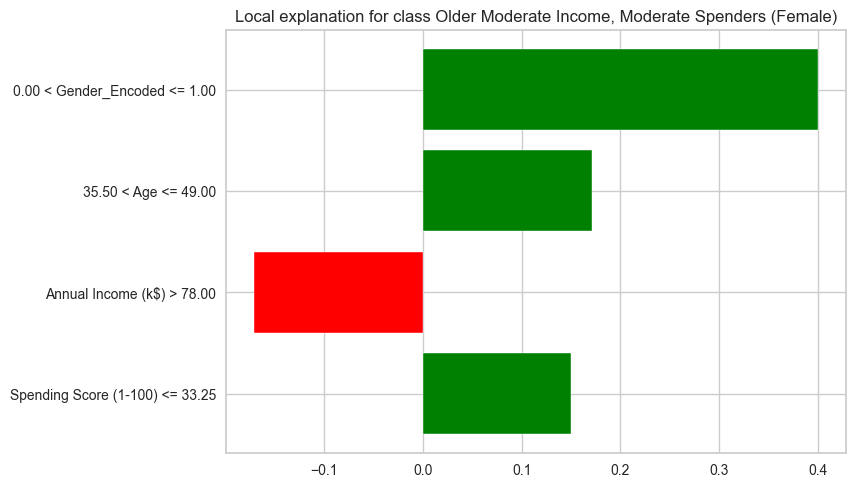

In [92]:
explain_instance_lime(RFClf,X_train,X_test,y_test,4)

#### LIME Feature Impact Analysis

**Feature Contributions:**

* **Gender_Encoded**: (green)  
  *Being female strongly supports this prediction.*

* **Age (35.5 < Age ≤ 49)**:(green)  
  *Age in the 35-49 range nudges prediction toward Middle-Age High Income.*

* **Spending Score ≤ 33.25**: (green)  
  *Low spending score pushes prediction toward this cluster.*

* **Annual Income > 78k**: (red)  
  *Surprisingly, high income slightly pushes away from this cluster (maybe because most in this cluster have moderate income).*

#### 3Key Takeaway

The model predicted correctly (**Middle-Age High Income**) because:

* Gender, age, and low spending score had strong positive contributions.
* High income was a slight negative factor, but not enough to flip the prediction.
* SHAP explains exactly how each feature nudged the prediction, so you can see why the model *“thinks”* this instance belongs here.


--- SHAP Local Explanation for Test Instance 4 ---
Feature values:
Age                        45
Annual Income (k$)        126
Spending Score (1-100)     28
Gender_Encoded              1
Name: 196, dtype: int32

Actual label: Middle-Age High Income, Low Spenders (Mixed)
Predicted label: Middle-Age High Income, Low Spenders (Mixed)
Prediction probabilities: [0.785 0.195 0.    0.02  0.   ]



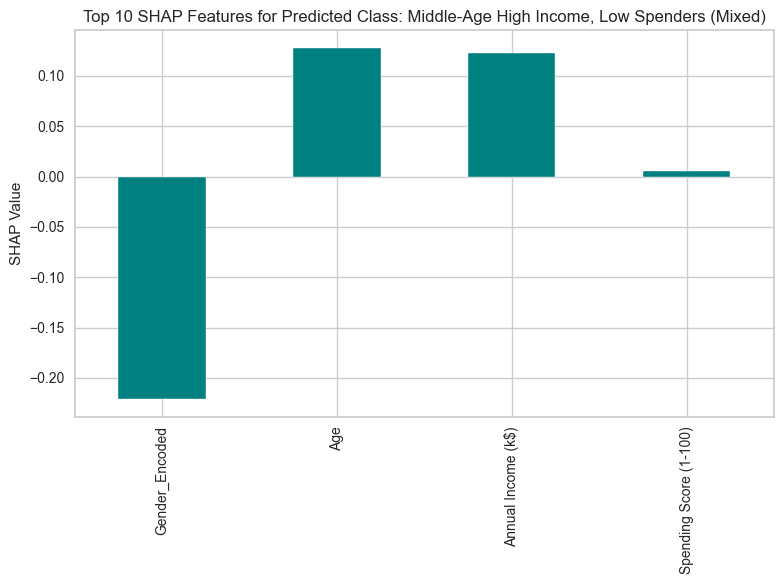

In [107]:
shap_values, shap_series = explain_instance_shap(
    RFClf=RFClf,
    X_train=X_train,
    X_test=X_test,
    y_test=y_test,
    instance_idx=4
)

In [113]:
save_model(kmeans_model,"models/kmeans_model", model_only=True)

Model Successfully Saved


(KMeans(n_clusters=5, random_state=123), 'models/kmeans_model.pkl')